In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import folium
import plotly.express as px

In [2]:
hostel = pd.read_csv('Hostel.csv')

## Japan Hostel Dataset
#### Dataset source = https://www.kaggle.com/koki25ando/hostel-world-dataset

Japan hostel dataset have around 300 hostel data at some city in Japan.
We can find the distribution of hostel in Japan.
The insight can be use to get some recommendation for the visitor

- hostel.name = Hostel name
- City = City location of the Hostel
- price.from = Price of the hostel
- Distance = Distance from hostel to the city centre
- summary.score = Summary score from all rating
- rating.band = categorical rating
- atmosphere = The evaluationscore of the hostel atmosphere
- cleanliness = The evaluation score of the hostel cleanliness
- facilities = The evaluation score of the hostel facilities
- location.y = The evaluation score of the hostel location
- security = The evaluation score of the hostel security
- staff = The evaluation score of the hostel staff
- valueformoney = The evaluation score of how valuable are the hostel
- lon = longitude
- lat = latitude




# Data Preparation

In [3]:
hostel.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
hostel

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,YADOYA Guesthouse Green,Tokyo,2300,2.6km from city centre,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
338,YADOYA Guesthouse Orange,Tokyo,2000,2.9km from city centre,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
339,YAWP! backpackers,Tokyo,2500,17.5km from city centre,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
340,You En Me House,Kyoto,2800,2.4km from city centre,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376


In [5]:
hostel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hostel.name    342 non-null    object 
 1   City           342 non-null    object 
 2   price.from     342 non-null    int64  
 3   Distance       342 non-null    object 
 4   summary.score  327 non-null    float64
 5   rating.band    327 non-null    object 
 6   atmosphere     327 non-null    float64
 7   cleanliness    327 non-null    float64
 8   facilities     327 non-null    float64
 9   location.y     327 non-null    float64
 10  security       327 non-null    float64
 11  staff          327 non-null    float64
 12  valueformoney  327 non-null    float64
 13  lon            298 non-null    float64
 14  lat            298 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 40.2+ KB


In [6]:
hostel.describe()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
count,3.420000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,8.388012e+03,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.756376,34.976583
std,7.641527e+04,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251995,2.040896
min,1.000000e+03,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,2.000000e+03,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505314,34.668900
50%,2.500000e+03,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761617,34.998471
75%,2.900000e+03,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


## Checking on Missing Value

<AxesSubplot:>

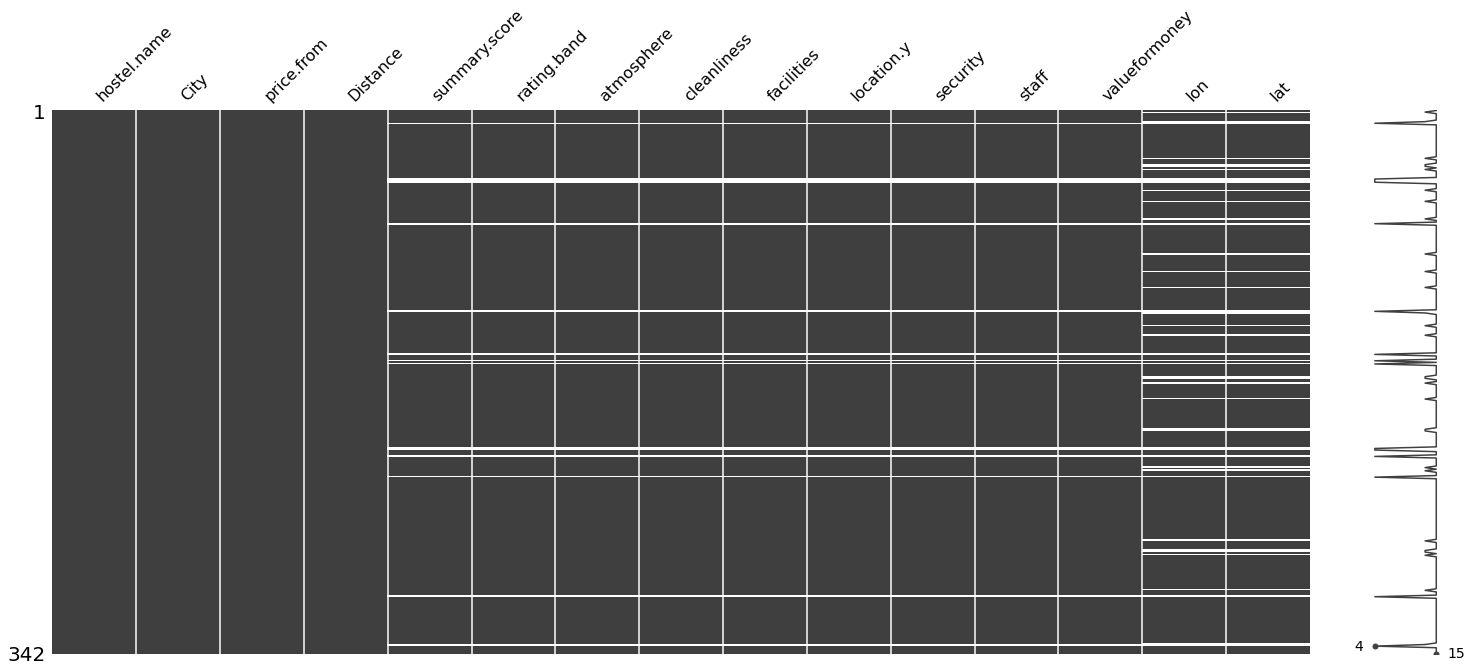

In [7]:
import missingno as msno
msno.matrix(hostel)

In [8]:
hostel.dropna(thresh=13,inplace=True)

Dropping some data which have so many missing values. I keep data that have missing value only on latitude and longitude.

In [9]:
hostel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 341
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hostel.name    327 non-null    object 
 1   City           327 non-null    object 
 2   price.from     327 non-null    int64  
 3   Distance       327 non-null    object 
 4   summary.score  327 non-null    float64
 5   rating.band    327 non-null    object 
 6   atmosphere     327 non-null    float64
 7   cleanliness    327 non-null    float64
 8   facilities     327 non-null    float64
 9   location.y     327 non-null    float64
 10  security       327 non-null    float64
 11  staff          327 non-null    float64
 12  valueformoney  327 non-null    float64
 13  lon            298 non-null    float64
 14  lat            298 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 40.9+ KB


In [10]:
hostel

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,YADOYA Guesthouse Green,Tokyo,2300,2.6km from city centre,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
338,YADOYA Guesthouse Orange,Tokyo,2000,2.9km from city centre,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
339,YAWP! backpackers,Tokyo,2500,17.5km from city centre,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
340,You En Me House,Kyoto,2800,2.4km from city centre,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376


<AxesSubplot:>

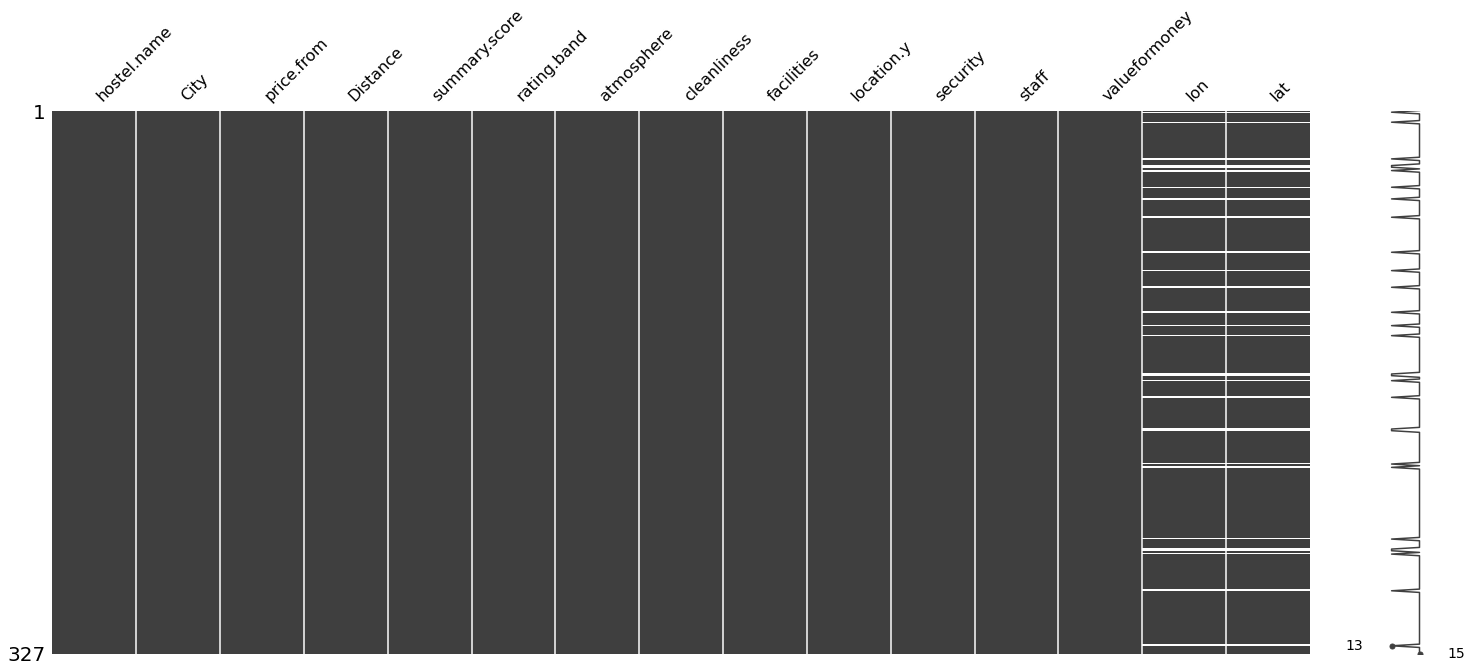

In [11]:
import missingno as msno
msno.matrix(hostel)

In [12]:
hostel.reset_index(inplace=True)

In [13]:
hostel.drop(columns=['index'],inplace=True)

#### Turn 'Distance' feature into float by removing the text, but keeping the number

In [14]:
for i in range(hostel.shape[0]):
    distance = hostel.loc[i, 'Distance']
    lower, _ = distance.split('km')
    lower = lower.strip()
    lower = float(lower)
    hostel.loc[i, 'Distance'] = lower

# Data Visualization

In [66]:
hostel.City.value_counts()

Tokyo           122
Osaka           101
Kyoto            73
Fukuoka-City     17
Hiroshima        14
Name: City, dtype: int64

#### Counting Hostel in Each City

<AxesSubplot:>

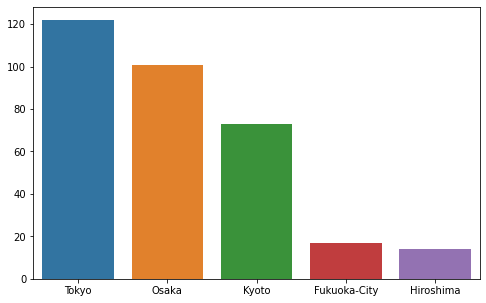

In [15]:
plt.figure(figsize=(8,5))
city = hostel.City.value_counts()
sns.barplot(x=city.keys(),y=city.values)

- There are 122 hostel at Tokyo, 101 hostel at Osaka, 73 hostel at Kyoto, 17 hostel at Fukuoka-City, and 14 hostel at Hiroshima

### Plotting some distribution and plots

<AxesSubplot:xlabel='price.from'>

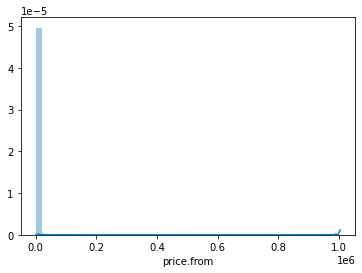

In [16]:
sns.distplot(hostel['price.from'],kde=True)

<AxesSubplot:xlabel='Distance'>

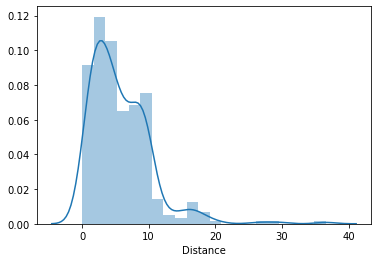

In [17]:
sns.distplot(hostel['Distance'],kde=True)

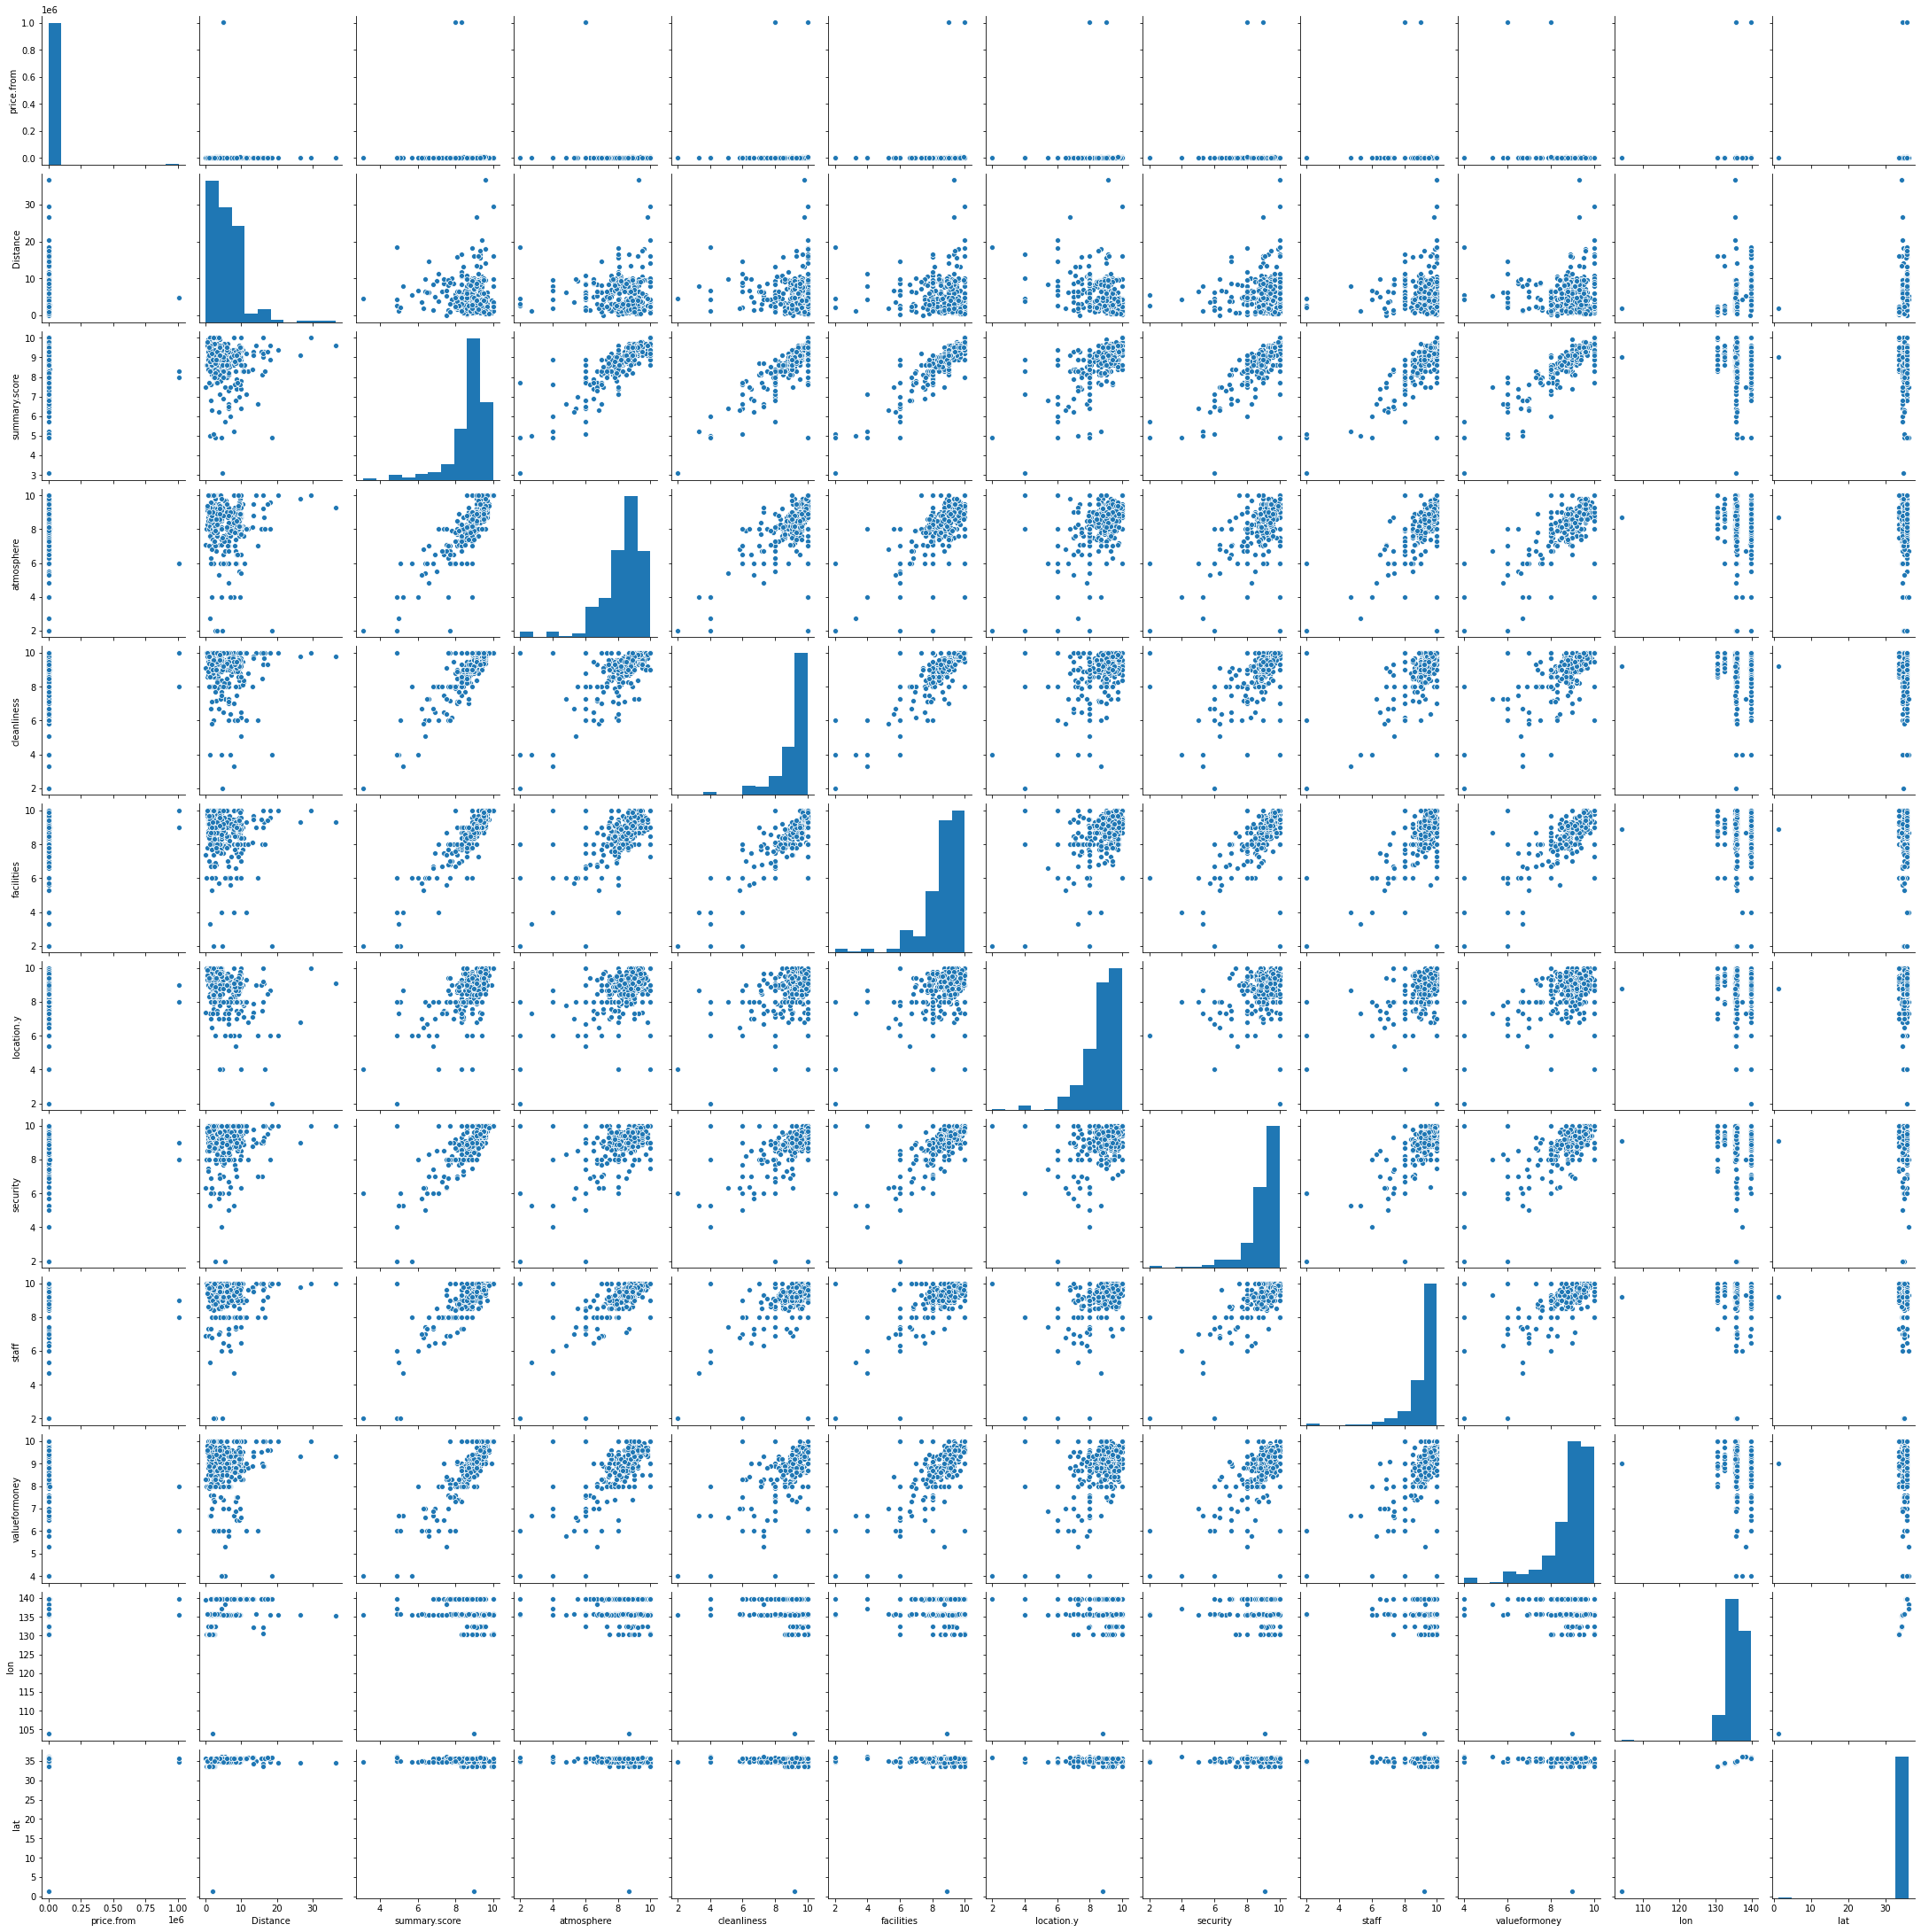

In [18]:
sns.pairplot(hostel)

- Higher score make hostel more valuable for money

#### Summary Score

<AxesSubplot:xlabel='summary.score'>

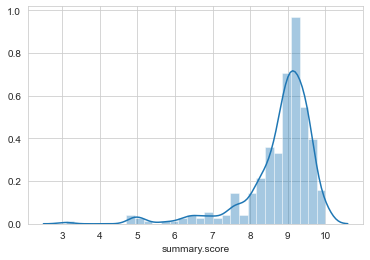

In [67]:
sns.distplot(hostel['summary.score'])

In [68]:
hostel['summary.score'].describe()

count    327.000000
mean       8.782569
std        0.960909
min        3.100000
25%        8.600000
50%        9.000000
75%        9.400000
max       10.000000
Name: summary.score, dtype: float64

<AxesSubplot:xlabel='City', ylabel='summary.score'>

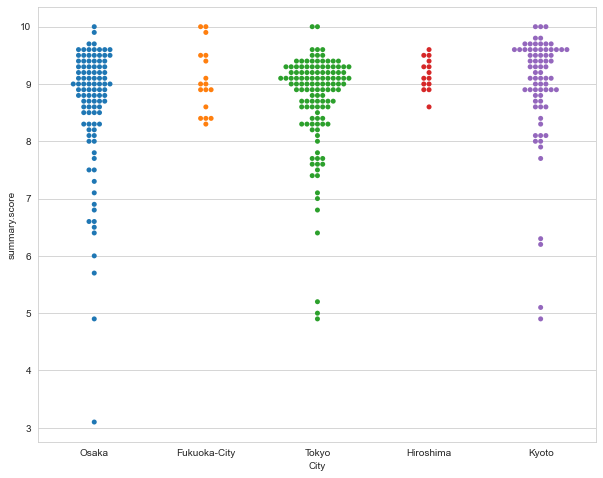

In [20]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.swarmplot(x='City', y='summary.score', data=hostel)

- Overall, hostel in Japan have score 9 out of 10.

#### Distance

<AxesSubplot:xlabel='Distance'>

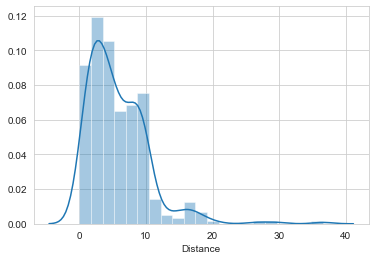

In [21]:
sns.distplot(hostel.Distance)

<AxesSubplot:xlabel='City', ylabel='Distance'>

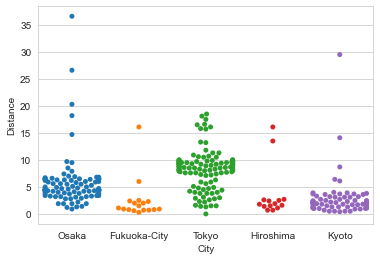

In [22]:
sns.swarmplot(x=hostel.City, y=hostel.Distance)

- At Kyoto, Hiroshima, and Fukuoka-City, most of the hostel are near to the city center (below 5 km to city center)
- At Osaka most of the hostel are around 5km from the city center
- There are a lot of hostel at Tokyo above 5km distance from the city center

<AxesSubplot:xlabel='price.from', ylabel='City'>

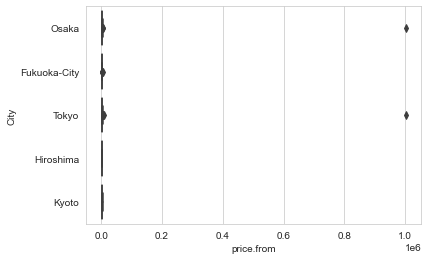

In [23]:
sns.boxplot(y=hostel.City, x=hostel['price.from'], orient='h')

#### Dropping outlier

In [24]:


from scipy.stats import iqr

iqr = iqr(hostel['price.from'])

lower_threshold = np.quantile(hostel['price.from'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(hostel['price.from'], 0.75) + 1.5 * iqr

outlier = hostel[(hostel['price.from'] < lower_threshold) | (hostel['price.from'] > upper_threshold)]
data_wth_outlier = hostel[(hostel['price.from'] > lower_threshold) & (hostel['price.from'] < upper_threshold)]

In [25]:
data_wth_outlier

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,YADOYA Guesthouse Green,Tokyo,2300,2.6,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
323,YADOYA Guesthouse Orange,Tokyo,2000,2.9,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
324,YAWP! backpackers,Tokyo,2500,17.5,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
325,You En Me House,Kyoto,2800,2.4,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376


#### Hostel Price Distribution and Plots without outlier

<AxesSubplot:xlabel='price.from'>

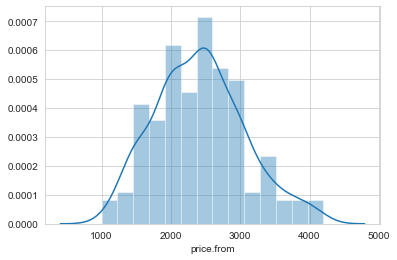

In [26]:
sns.distplot(data_wth_outlier['price.from'])

In [78]:
data_wth_outlier['price.from'].mean()

2418.553459119497

<AxesSubplot:xlabel='City', ylabel='price.from'>

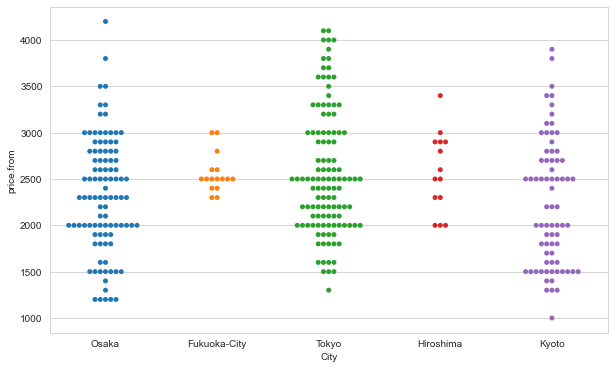

In [27]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=data_wth_outlier.City , y=data_wth_outlier['price.from'])

#### Plotting Hostel on Map with Folium base on 'lat' and 'lon

In [52]:
x = hostel.dropna()
x

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,YADOYA Guesthouse Green,Tokyo,2300,2.6,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
323,YADOYA Guesthouse Orange,Tokyo,2000,2.9,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
324,YAWP! backpackers,Tokyo,2500,17.5,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
325,You En Me House,Kyoto,2800,2.4,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376


In [60]:
import folium
from folium.plugins import MarkerCluster
japan = folium.Map(location=[36.2048, 138.2529])
for i in range(0,len(x)):
    folium.Marker([x.iloc[i]['lat'], x.iloc[i]['lon']], popup=x.iloc[i]['hostel.name']).add_to(japan)

japan

In [63]:
import folium
from folium.plugins import HeatMap
japan = folium.Map(location=[36.2048, 138.2529])
HeatMap(hostel[['lat','lon']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(japan)
display(japan)